In [1]:
#Install sodapy
#!pip install sodapy


In [2]:
#Import relevant packages
import pandas as pd
from sodapy import Socrata
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt


In [3]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("pnau-cf66", limit=2000)
results_df = pd.DataFrame.from_records(results)


In [4]:
results_df

,link,description
0,{'url': 'https://data.cityofchicago.org/Transp...,Point data representing bus garage and facilit...
1,{'url': 'https://data.cityofchicago.org/Transp...,Line data representing CTA bus routes. To view...
2,{'url': 'https://data.cityofchicago.org/Transp...,"Point data representing over 11,000 CTA bus st..."
3,{'url': 'https://data.cityofchicago.org/Transp...,Point data representing locations of all bus t...
4,{'url': 'http://data.cityofchicago.org/dataset...,Point data representing sites that sell/vend C...
5,{'url': 'https://data.cityofchicago.org/Transp...,Lines representing approximately where the CTA...
6,{'url': 'https://data.cityofchicago.org/Transp...,Points representing CTA Rail Stations. To view...
7,{'url': 'https://data.cityofchicago.org/Transp...,Point data representing CTA park and ride loca...
8,{'url': 'http://data.cityofchicago.org/dataset...,This dataset gives annual ridership totals dat...
9,{'url': 'http://data.cityofchicago.org/dataset...,This dataset shows total daily ridership on a ...


In [5]:

bus_stops_df = gpd.read_file("https://data.cityofchicago.org/resource/6uva-a5ei.geojson")

In [6]:
bus_stops_df

,name,sun,wkday,route,sat,geometry
0,ROOSEVELT,True,True,12,True,"MULTILINESTRING ((-87.64791 41.86713, -87.6474..."
1,UNION/STREETERVILLE EXPRESS,False,True,121,False,"MULTILINESTRING ((-87.62450 41.88833, -87.6249..."
2,BRONZEVILLE/UNION STATION,False,True,1,False,"MULTILINESTRING ((-87.62326 41.83103, -87.6232..."
3,HALSTED/95TH,False,True,108,False,"MULTILINESTRING ((-87.59053 41.65577, -87.5906..."
4,LINCOLN,True,True,11,True,"MULTILINESTRING ((-87.68883 41.96676, -87.6888..."
...,...,...,...,...,...,...
122,OGILVIE/STREETERVILLE EXPRESS,False,True,120,False,"MULTILINESTRING ((-87.62450 41.88833, -87.6249..."
123,JACKSON,True,True,126,True,"MULTILINESTRING ((-87.77390 41.87647, -87.7739..."
124,MADISON,True,True,20,True,"MULTILINESTRING ((-87.77391 41.88008, -87.7731..."
125,SOLDIER FIELD EXPRESS,False,False,128,False,"MULTILINESTRING ((-87.61699 41.86502, -87.6153..."


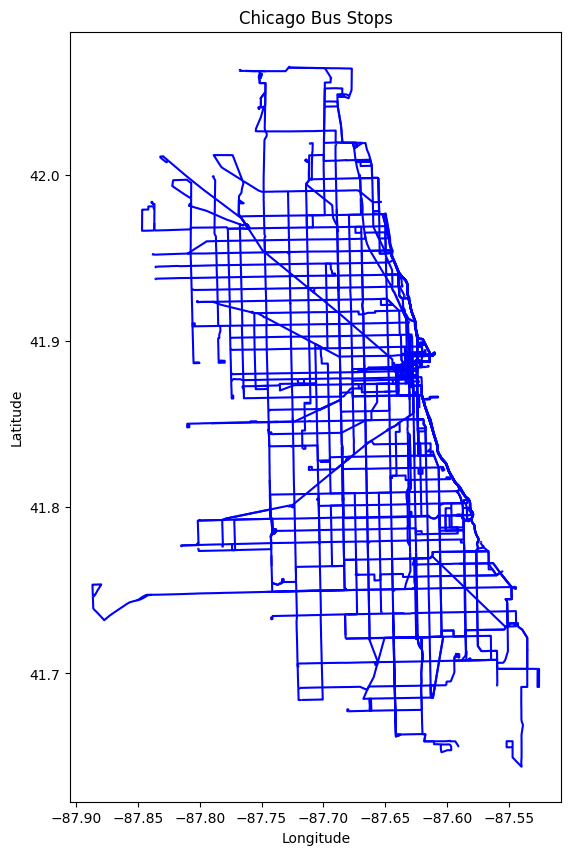

In [9]:
#Plot the bus stops using the geometry column
bus_stops_df.plot(figsize=(10, 10), color='blue', markersize=5)
plt.title("Chicago Bus Stops")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
